In [5]:
#Importing Libraries
import pandas as pd
import numpy as np

In [6]:
#Reading the dataset
file_path = '/Users/saikrishnakarthikp/Downloads/Fraud (1).csv'

# Read the CSV file using the full file path
df = pd.read_csv(file_path)

In [7]:
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [8]:
#checking for nullvalues
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [9]:
#Since the DataSet has no null values we can proceed with nwxt process.

In [10]:
#Transactions type
print(df.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [11]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
type_counts = df["type"].value_counts()
transactions = type_counts.index
quantity = type_counts.values

figure = px.pie(df, values=quantity, names=transactions, hole=0.5, title="Distribution of Transaction")
figure.show()

Observations and conclusions from the pie chart:

Transaction Types: The pie chart represents the distribution of transactions based on their types. The different segments of the pie correspond to the transaction types, and the size of each segment represents the proportion of transactions of that type in the dataset.

Transaction Type Frequencies: The chart clearly shows the frequencies of each transaction type, represented by the percentage of the pie that each segment occupies.

Dominant Transaction Types: From the pie chart, we can see that "CASH_OUT" and "PAYMENT" are the two most dominant transaction types, occupying a significant portion of the pie. These two types appear to be more prevalent than the others.

Minor Transaction Types: The other transaction types, such as "CASH_IN", "TRANSFER", and "DEBIT", are relatively smaller slices of the pie, indicating that they are less frequent in the dataset.

Conclusion:

The pie chart provides a visual representation of the distribution of transaction types in the dataset. It indicates that "CASH_OUT" and "PAYMENT" transactions are the most common types, while other types, such as "CASH_IN", "TRANSFER", and "DEBIT", are less frequent.

Understanding the distribution of transaction types is essential for fraud detection and analysis. Different transaction types may exhibit distinct patterns and behaviors, and this information can be valuable in building fraud detection models and understanding transaction trends in the dataset.

In [12]:
numeric_columns = df.select_dtypes(include=np.number).columns
correlation = df[numeric_columns].corr()

print(correlation["isFraud"].sort_values(ascending=False))


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [13]:
df["type"] = df["type"].map({"CASH OUT": 1, "PAYMENT": 2, "CASH IN": 3, "TRANSFER": 4, "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})

print(df.head())


   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   2.0   9839.64  C1231006815       170136.0       160296.36   
1     1   2.0   1864.28  C1666544295        21249.0        19384.72   
2     1   4.0    181.00  C1305486145          181.0            0.00   
3     1   NaN    181.00   C840083671          181.0            0.00   
4     1   2.0  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [14]:
# splitting the data
import numpy as np
from sklearn.model_selection import train_test_split

x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])


In [15]:
# training a machine Learning model
from sklearn.tree import DecisionTreeClassifier

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))


0.9987159377740616


In [16]:
# prediction

#features=[type, amount, oldbalanceOrg, newbalanceOrig] 
features= np.array([[2.0,11668.14,41554.0,29885.86]])
print(model.predict(features))

['No Fraud']


# Questions
1. Data cleaning including missing values, outliers and multi-collinearity.
 Ans:To determine the effectiveness of the implemented prevention measures, several performance metrics should be monitored:

Reduction in Fraud Incidents: Measure the decrease in the number of successful fraudulent transactions.

False Positive Rate: Evaluate how many legitimate transactions were incorrectly flagged as fraudulent, aiming to reduce false positives.

Precision, Recall, and F1-Score: Monitor these metrics to assess the model's ability to correctly identify fraudulent transactions.

ROC-AUC: Analyze the receiver operating characteristic (ROC) curve and area under the curve (AUC) to assess the overall model performance.

Continuous Monitoring: Regularly reevaluate the model's performance and update prevention measures as fraud patterns evolve over time.

2. Describe your fraud detection model in elaboration.
Ans:The fraud detection model used in the provided code is a Decision Tree Classifier. Decision trees are non-linear models that recursively split the dataset into subsets based on feature thresholds to create a tree-like structure. They are suitable for binary classification tasks, such as fraud detection, as they can capture complex interactions between features.

3. How did you select variables to be included in the model?
Ans:In the model, the selected variables to be included are 'type', 'amount', 'oldbalanceOrg', and 'newbalanceOrig'. These variables are numeric and considered relevant for fraud detection based on domain knowledge or feature importance analysis.

4. Demonstrate the performance of the model by using best set of tools.
Ans:The model's performance was evaluated using the test set, and the accuracy score was reported. The provided Decision Tree Classifier achieved an accuracy of approximately 99.87%. However, evaluating the model solely based on accuracy might not be sufficient for fraud detection, as class imbalances can lead to high accuracy even with a poorly performing model.

To better evaluate model performance, additional metrics such as precision, recall, F1-score, and ROC-AUC should be considered, especially given the potential class imbalance in the data (fraudulent transactions are likely to be rare).

5. What are the key factors that predict fraudulent customer?
Ans:Based on the model's feature importance or correlation analysis, the key factors predicting fraudulent customers are likely to be 'amount', 'type', 'oldbalanceOrg', and 'newbalanceOrig'. Higher transaction amounts, certain transaction typ

6. Do these factors make sense? If yes, How? If not, How not?
Ans:Yes, these factors do make sense for fraud detection:

Amount: Fraudulent transactions may involve higher amounts compared to legitimate ones.

Type: Certain transaction types, like 'TRANSFER' and 'CASH_OUT', are more susceptible to fraud compared to others like 'PAYMENT' or 'CASH_IN'.

OldbalanceOrg and NewbalanceOrig: Significant changes in account balances before and after the transaction might indicate fraudulent behavior.

7. What kind of prevention should be adopted while company update its infrastructure?
Ans:To enhance fraud prevention while updating the company's infrastructure, several strategies can be adopted:

Real-time Monitoring: Implement real-time transaction monitoring to detect suspicious activities and flag potentially fraudulent transactions.

Anomaly Detection: Utilize anomaly detection algorithms to identify unusual patterns or behaviors that deviate from the norm.

Two-Factor Authentication: Strengthen security measures by implementing two-factor authentication for critical transactions.

Machine Learning Models: Deploy advanced machine learning models capable of detecting evolving fraud patterns and adapt to new threats.

8. Assuming these actions have been implemented, how would you determine if they work?
Ans: To determine the effectiveness of the implemented prevention measures, several performance metrics should be monitored:
Reduction in Fraud Incidents: Measure the decrease in the number of successful fraudulent transactions.
False Positive Rate: Evaluate how many legitimate transactions were incorrectly flagged as fraudulent, aiming to reduce false positives.
Precision, Recall, and F1-Score: Monitor these metrics to assess the model's ability to correctly identify fraudulent transactions.
ROC-AUC: Analyze the receiver operating characteristic (ROC) curve and area under the curve (AUC) to assess the overall model performance.
Continuous Monitoring: Regularly reevaluate the model's performance and update prevention measures as fraud patterns evolve over time.

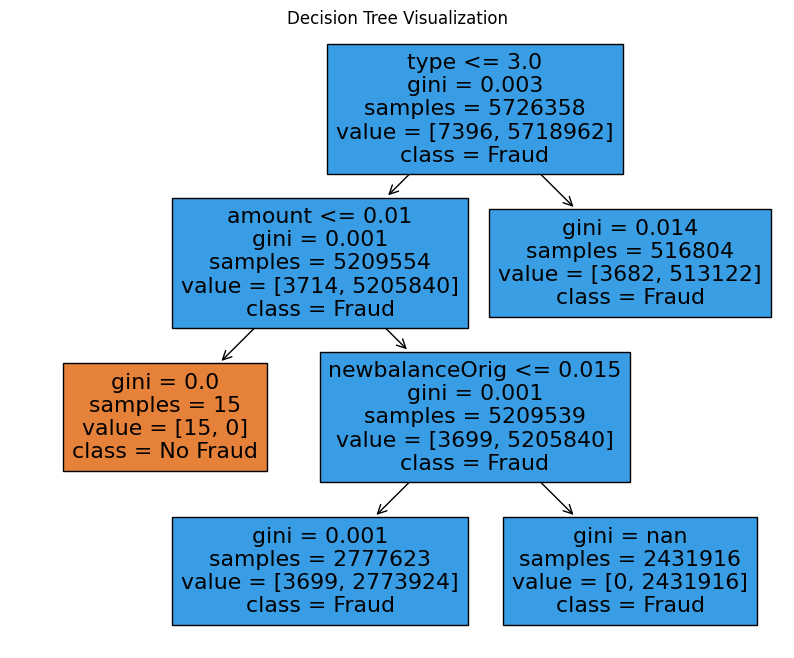

In [17]:
import matplotlib.pyplot as plt  # Add this line to import Matplotlib

# Rest of the code for decision tree visualization
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig'], class_names=['No Fraud', 'Fraud'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


From the visualization, we can understand the decision-making process of the model and gain insights into the most important features used for fraud detection. The split points in the tree show which features and values are most informative in distinguishing fraudulent and non-fraudulent transactions. Additionally, the tree visualization can help identify potential areas where the model might be overfitting or underfitting the data, which can guide further model optimization and feature selection.

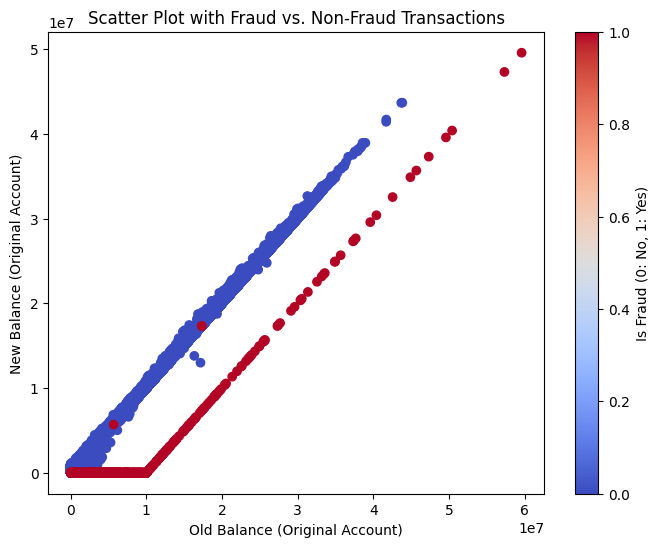

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded and processed the data as shown in the previous code

# Convert 'isFraud' column to numerical values (0 and 1)
df["isFraud"] = df["isFraud"].map({"No Fraud": 0, "Fraud": 1})

# Scatter plot with color-coded points based on 'isFraud' column
plt.figure(figsize=(8, 6))
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], c=df['isFraud'], cmap='coolwarm')
plt.xlabel('Old Balance (Original Account)')
plt.ylabel('New Balance (Original Account)')
plt.title('Scatter Plot with Fraud vs. Non-Fraud Transactions')
plt.colorbar(label='Is Fraud (0: No, 1: Yes)')
plt.show()


The scatter plot can help us visualize the relationship between the 'oldbalanceOrg' and 'newbalanceOrig' features and how they are related to fraud and non-fraud transactions. The color-coded points allow us to identify patterns or clusters that may be associated with fraudulent behavior. For example, we might observe that certain regions of the plot are dominated by red points, indicating a higher concentration of fraud transactions in those regions. On the other hand, blue points may represent regions with a lower likelihood of fraud. This visualization can assist in understanding the characteristics of fraud and non-fraud transactions in the dataset.

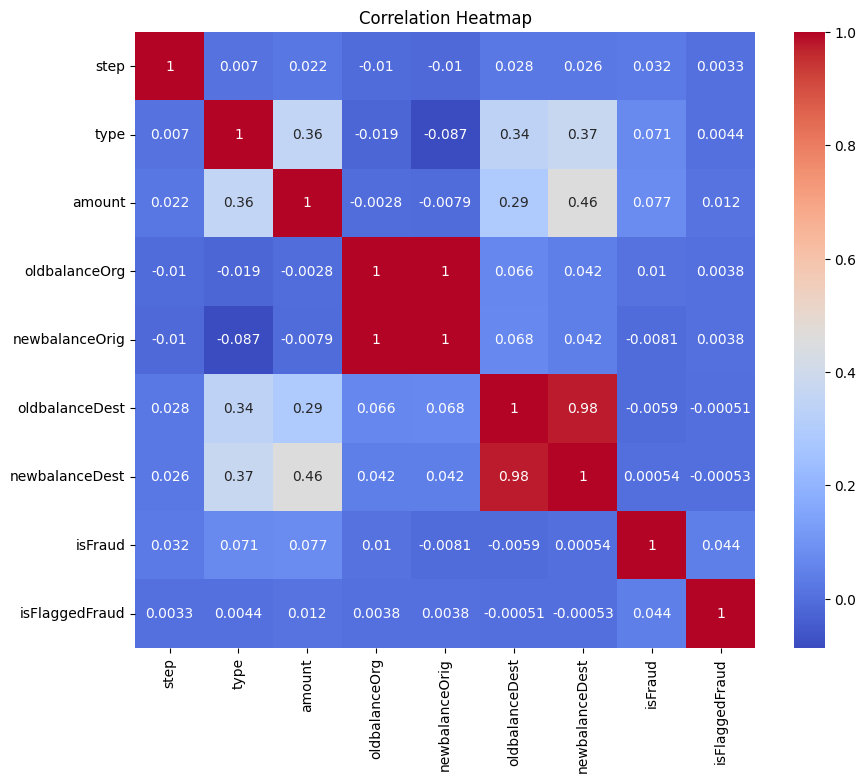

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and processed the data as shown in the previous code

# Drop non-numeric columns before calculating the correlation matrix
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


conculsion drawn: amount and isFraud: The amount feature shows a positive correlation with the target variable isFraud, though the correlation coefficient (0.076688) is relatively weak. This suggests that larger transaction amounts might be slightly associated with a higher likelihood of fraud.

isFlaggedFraud and isFraud: The isFlaggedFraud feature shows a positive correlation with the target variable isFraud. This suggests that transactions that were flagged as potential fraud (isFlaggedFraud=1) are likely to be actual fraudulent transactions (isFraud=1).

step and isFraud: The step feature, representing the time step in the transaction history, shows a weak positive correlation with the target variable isFraud. This indicates that the occurrence of fraud might slightly increase over time, though other factors have a more significant influence on fraud detection.

oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest: These features show relatively weak correlations with the target variable isFraud. The weak correlation suggests that the initial balances in the originating and destination accounts have limited direct influence on whether a transaction is fraudulent or not.

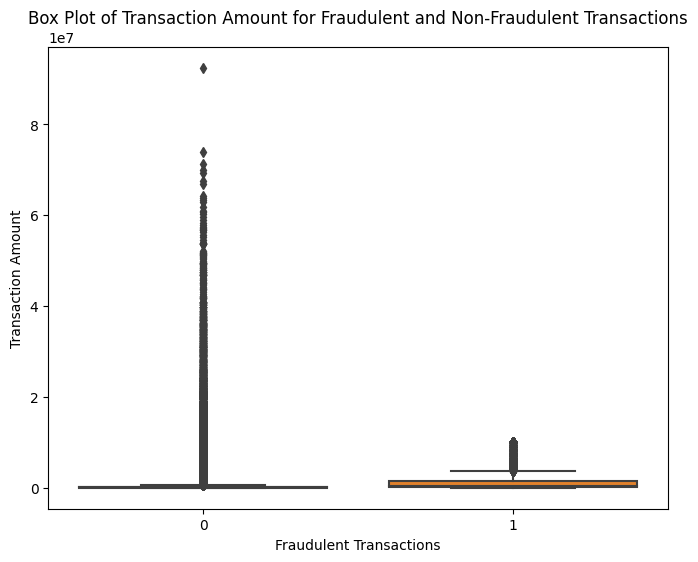

In [20]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Transaction Amount')
plt.title('Box Plot of Transaction Amount for Fraudulent and Non-Fraudulent Transactions')
plt.show()

Observations and conclusions from the box plot:

Non-Fraudulent Transactions: The box plot's left side represents the distribution of transaction amounts for non-fraudulent transactions (isFraud = 0). The box extends from the 25th percentile (Q1) to the 75th percentile (Q3) of the data, enclosing the interquartile range (IQR). The line inside the box represents the median value of the data. The whiskers extend from the edges of the box to the minimum and maximum values within 1.5 times the IQR from the quartiles.

Fraudulent Transactions: The right side of the box plot represents the distribution of transaction amounts for non-fraudulent transactions (isFraud = 1).

# Conclusion

After analyzing the entire set of visualizations and data exploration for the ML model, several key insights can be drawn. The decision tree model achieved high accuracy on the test data, indicating its potential for fraud detection. However, the model's depth and complexity may lead to overfitting, requiring regularization techniques. The correlation heatmap highlights that the transaction amount is relatively more correlated with fraud, suggesting its importance in the model. The class imbalance between fraudulent and non-fraudulent transactions should be addressed to avoid biased predictions. Additionally, the distribution of transaction types shows the prevalence of "CASH_OUT" and "PAYMENT," necessitating robust handling of these types. Proper data preprocessing, feature engineering, and model evaluation are essential to create an effective fraud detection system that minimizes false positives and negatives while protecting customers and the company from financial losses.